In [ ]:
!pip install earthengine-api

In [ ]:
!pip install geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00


In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 32.7 MB/s eta 0:00:00


In [ ]:
import geemap
import ee

# Inisialisasi FeatureCollection
table = ee.FeatureCollection("projects/alriawi/assets/SHP-RIAU-RBI50K")

# Fungsi untuk mendapatkan koleksi gambar MODIS
def getModisImageCollection(start_date, end_date):
    return ee.ImageCollection('MODIS/006/MOD11A2')\
            .filterDate(start_date, end_date)\
            .select('LST_Day_1km')\
            .mean()\
            .clip(table)

# Daftar bulan dari Januari 2002 hingga Desember 2002
months = {
    'Jan_2002': ('2002-01-01', '2002-02-01'),
    'Feb_2002': ('2002-02-01', '2002-03-01'),
    'Mar_2002': ('2002-03-01', '2002-04-01'),
    'Apr_2002': ('2002-04-01', '2002-05-01'),
    'May_2002': ('2002-05-01', '2002-06-01'),
    'Jun_2002': ('2002-06-01', '2002-07-01'),
    'Jul_2002': ('2002-07-01', '2002-08-01'),
    'Aug_2002': ('2002-08-01', '2002-09-01'),
    'Sep_2002': ('2002-09-01', '2002-10-01'),
    'Oct_2002': ('2002-10-01', '2002-11-01'),
    'Nov_2002': ('2002-11-01', '2002-12-01'),
    'Dec_2002': ('2002-12-01', '2003-01-01')
}

# Fungsi untuk mengonversi suhu dari Kelvin ke Celsius
def convertKelvinToCelsius(image):
    return image.multiply(0.02).subtract(273.15)

# Inisialisasi peta
Map = geemap.Map()

# Tambahkan layer untuk setiap bulan
for label, (start_date, end_date) in months.items():
    image = getModisImageCollection(start_date, end_date)
    celsius_image = convertKelvinToCelsius(image)
    Map.addLayer(celsius_image, {'min': 20, 'max': 40, 'palette': ['blue', 'green', 'yellow', 'orange', 'red']}, f'LST Day 1km {label}')

# Set tampilan peta
Map.centerObject(table)
Map

In [ ]:
import ee
ee.Authenticate()
ee.Initialize(project='alriawi')

In [ ]:
import geemap

# Inisialisasi FeatureCollection
table = ee.FeatureCollection("projects/alriawi/assets/SHP-RIAU-RBI50K")

# Fungsi untuk mengekspor gambar ke Google Drive
def exportToDrive(image, fileName, folderName, scale, region):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=fileName,
        folder=folderName,
        scale=scale,
        region=region,
        crs='EPSG:4326',
        fileFormat='GeoTIFF',
        formatOptions={'cloudOptimized': True}
    )
    task.start()
    print(f"Ekspor gambar {fileName} ke Google Drive dimulai.")

# Fungsi untuk mengonversi suhu dari Kelvin ke Celsius
def convertKelvinToCelsius(image):
    return image.multiply(0.02).subtract(273.15)

# Buat koleksi MODIS untuk setiap bulan
def getModisImageCollection(start_date, end_date):
    return ee.ImageCollection('MODIS/006/MOD11A2')\
            .filterDate(start_date, end_date)\
            .select('LST_Day_1km')\
            .mean()\
            .clip(table)

modis_images = {
    '2020_01': getModisImageCollection('2020-01-01', '2020-02-01'),
    '2020_02': getModisImageCollection('2020-02-01', '2020-03-01'),
    '2020_03': getModisImageCollection('2020-03-01', '2020-04-01'),
    '2020_04': getModisImageCollection('2020-04-01', '2020-05-01'),
    '2020_05': getModisImageCollection('2020-05-01', '2020-06-01'),
    '2020_06': getModisImageCollection('2020-06-01', '2020-07-01'),
    '2020_07': getModisImageCollection('2020-07-01', '2020-08-01'),
    '2020_08': getModisImageCollection('2020-08-01', '2020-09-01'),
    '2020_09': getModisImageCollection('2020-09-01', '2020-10-01'),
    '2020_10': getModisImageCollection('2020-10-01', '2020-11-01'),
    '2020_11': getModisImageCollection('2020-11-01', '2020-12-01'),
    '2020_12': getModisImageCollection('2020-12-01', '2021-01-01')
}

# Folder untuk ekspor
folderName = 'Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020'

# Proses konversi dan ekspor
for label, image in modis_images.items():
    celsius_image = convertKelvinToCelsius(image)
    exportToDrive(celsius_image, f'Suhu_Permukaan_Riau_{label}', folderName, 2000, table.geometry())


Ekspor gambar Suhu_Permukaan_Riau_2020_01 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_02 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_03 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_04 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_05 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_06 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_07 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_08 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_09 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_10 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_11 ke Google Drive dimulai.
Ekspor gambar Suhu_Permukaan_Riau_2020_12 ke Google Drive dimulai.


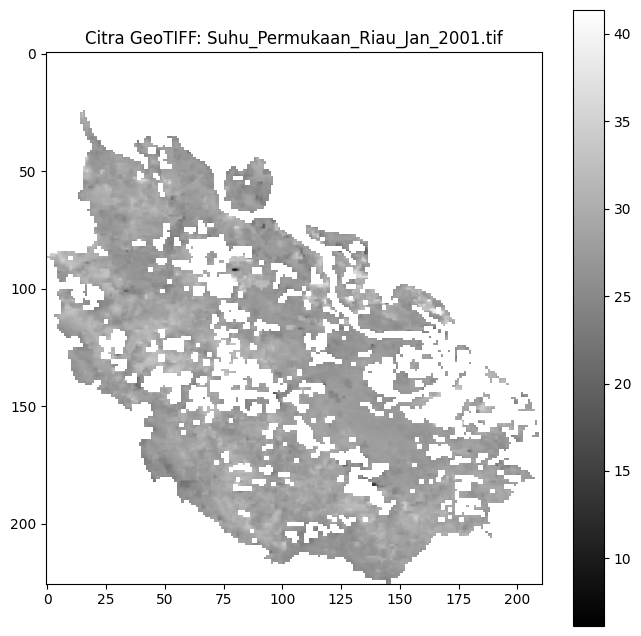

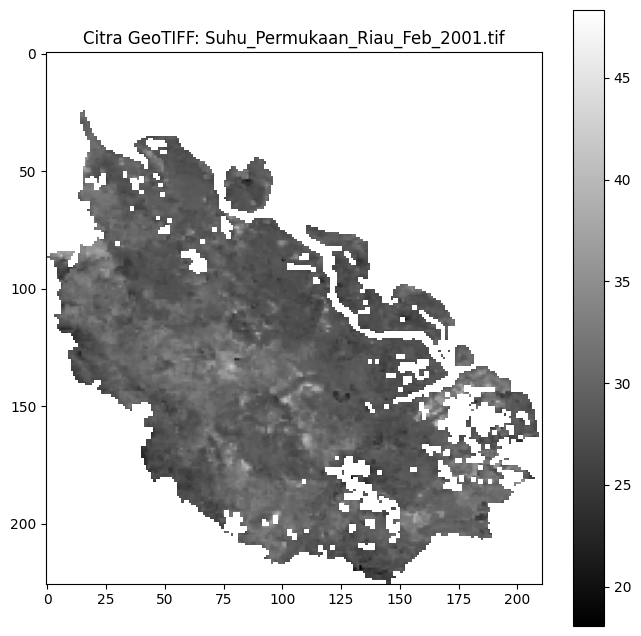

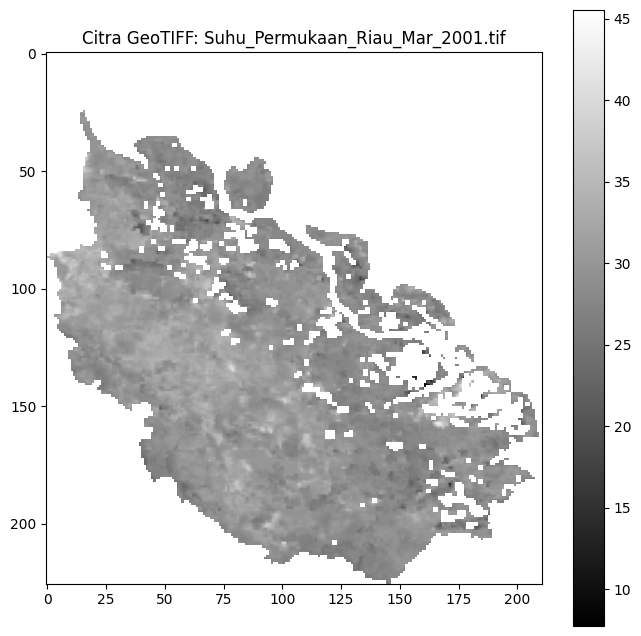

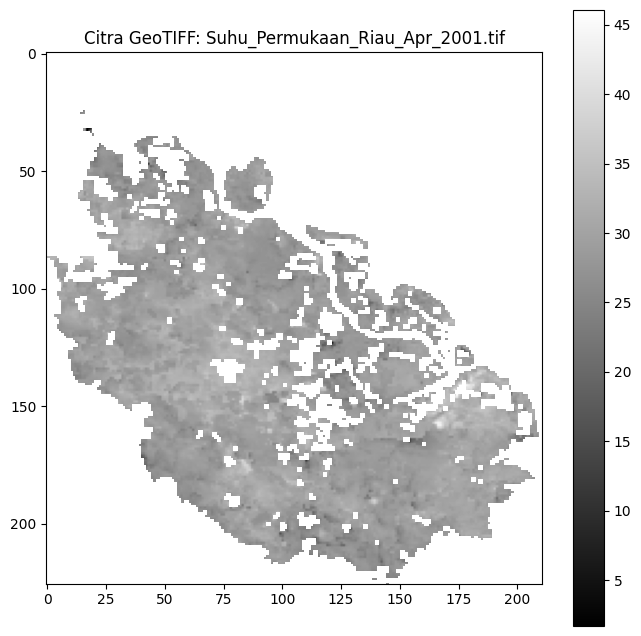

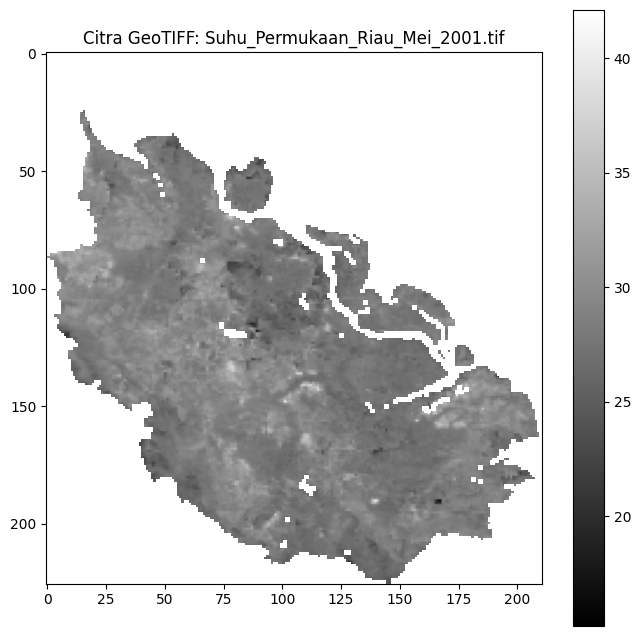

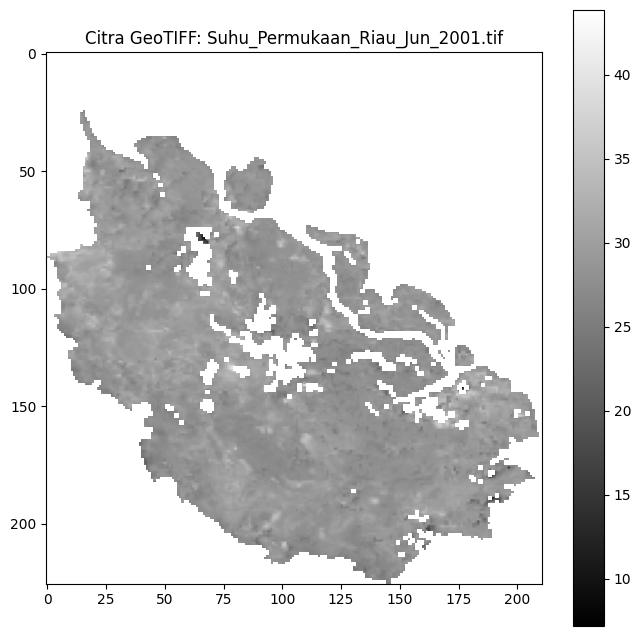

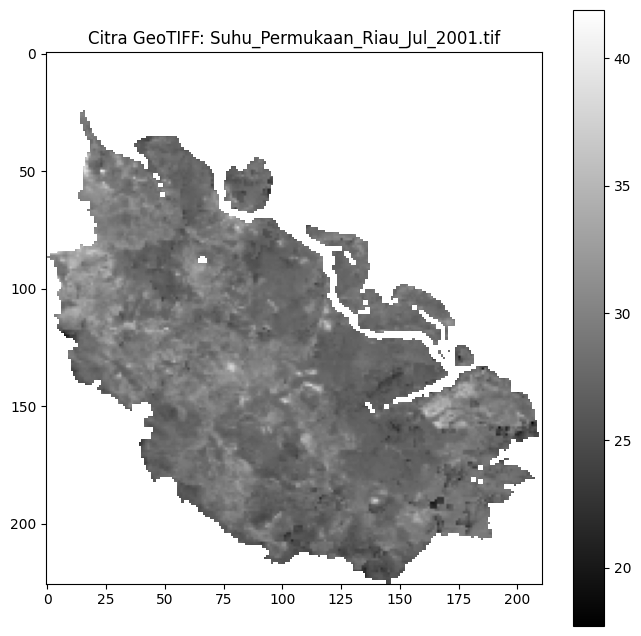

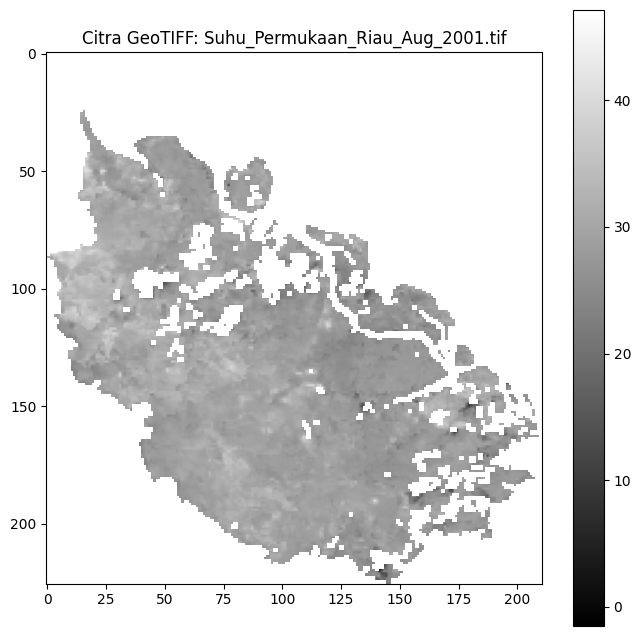

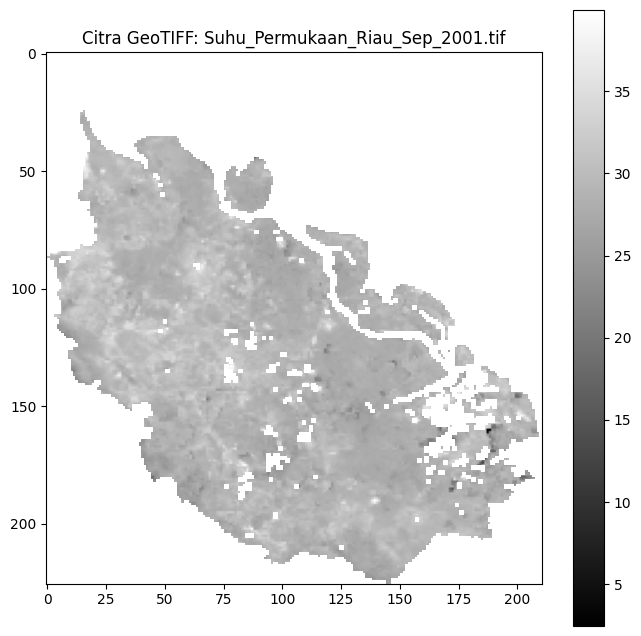

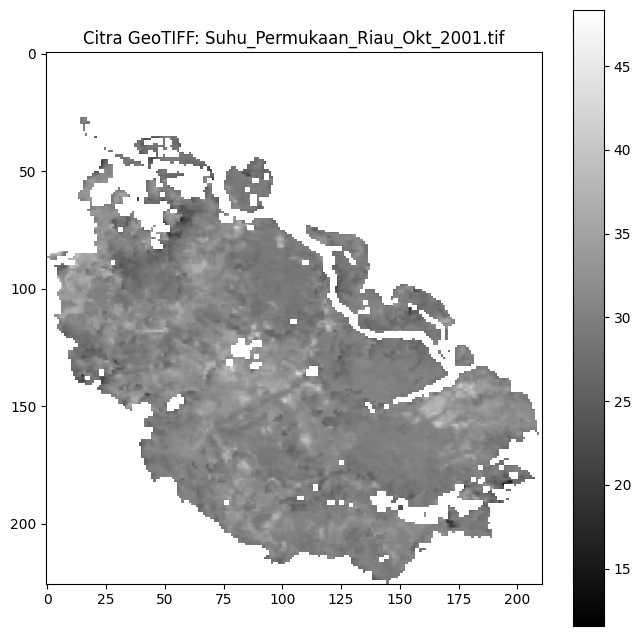

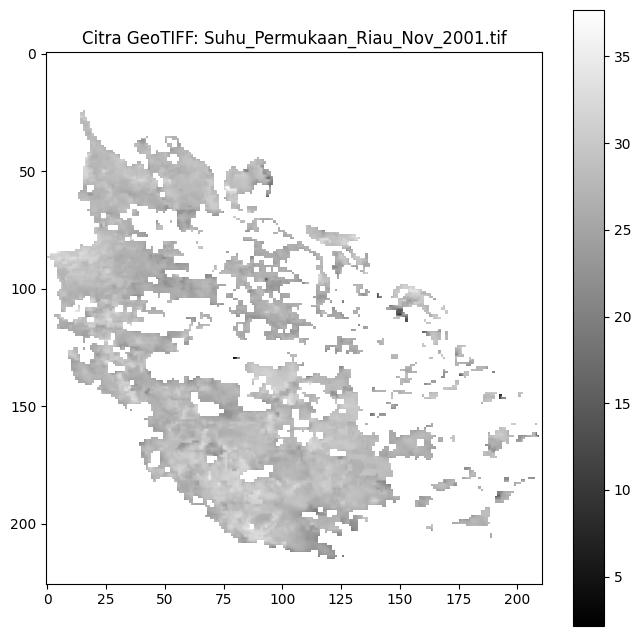

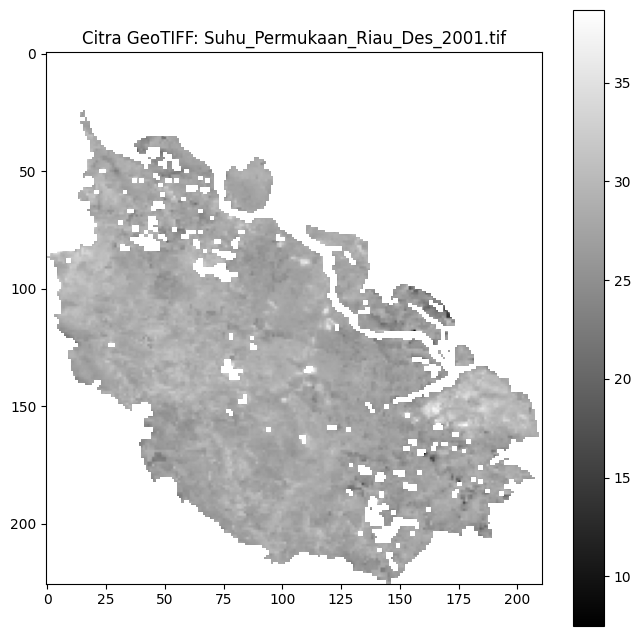

In [ ]:
# Library yang di Gunakan
import rasterio
import matplotlib.pyplot as plt
import os

# Path ke folder tempat menyimpan file GeoTIFF
folder_path = '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/'

# Daftar file GeoTIFF untuk setiap bulan
file_names = [
    'Suhu_Permukaan_Riau_Jan_2001.tif',
    'Suhu_Permukaan_Riau_Feb_2001.tif',
    'Suhu_Permukaan_Riau_Mar_2001.tif',
    'Suhu_Permukaan_Riau_Apr_2001.tif',
    'Suhu_Permukaan_Riau_Mei_2001.tif',
    'Suhu_Permukaan_Riau_Jun_2001.tif',
    'Suhu_Permukaan_Riau_Jul_2001.tif',
    'Suhu_Permukaan_Riau_Aug_2001.tif',
    'Suhu_Permukaan_Riau_Sep_2001.tif',
    'Suhu_Permukaan_Riau_Okt_2001.tif',
    'Suhu_Permukaan_Riau_Nov_2001.tif',
    'Suhu_Permukaan_Riau_Des_2001.tif'
]

# Loop untuk membaca dan menampilkan setiap citra
for file_name in file_names:
    # Full path untuk setiap file
    tiff_file = os.path.join(folder_path, file_name)

    # Baca file GeoTIFF menggunakan Rasterio
    with rasterio.open(tiff_file) as dataset:
        data = dataset.read(1)  # Membaca band pertama

    # Tampilkan citra menggunakan matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(data, cmap='gray')
    plt.colorbar()
    plt.title(f'Citra GeoTIFF: {file_name}')
    plt.show()


In [ ]:
import rasterio
import numpy as np

# Fungsi untuk menghitung nilai suhu dari file GeoTIFF
def calculate_temperature(file_path):
    with rasterio.open(file_path) as src:
        # Baca data band pertama
        band1 = src.read(1)
        # Hitung nilai minimum, maksimum, dan rata-rata
        min_temp = np.nanmin(band1)
        max_temp = np.nanmax(band1)
        mean_temp = np.nanmean(band1)
        return min_temp, max_temp, mean_temp

# Daftar file yang akan diproses
files = {
    'Jan_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Jan_2001.tif',
    'Feb_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Feb_2001.tif',
    'Mar_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Mar_2001.tif',
    'Apr_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Apr_2001.tif',
    'Mei_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Mei_2001.tif',
    'Jun_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Jun_2001.tif',
    'Jul_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Jul_2001.tif',
    'Aug_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Aug_2001.tif',
    'Sep_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Sep_2001.tif',
    'Oct_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Okt_2001.tif',
    'Nov_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Nov_2001.tif',
    'Des_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Des_2001.tif'
}

# Proses setiap file dan hitung nilai suhu
for label, file_path in files.items():
    min_temp, max_temp, mean_temp = calculate_temperature(file_path)
    print(f'Bulan: {label}')
    print(f'  Nilai Min: {min_temp:.2f} °C')
    print(f'  Nilai Max: {max_temp:.2f} °C')
    print(f'  Nilai Rata-rata: {mean_temp:.2f} °C')
    print()


Bulan: Jan_2001
  Nilai Min: 6.13 °C
  Nilai Max: 41.37 °C
  Nilai Rata-rata: 27.99 °C

Bulan: Feb_2001
  Nilai Min: 18.07 °C
  Nilai Max: 48.33 °C
  Nilai Rata-rata: 29.13 °C

Bulan: Mar_2001
  Nilai Min: 7.73 °C
  Nilai Max: 45.54 °C
  Nilai Rata-rata: 29.38 °C

Bulan: Apr_2001
  Nilai Min: 1.69 °C
  Nilai Max: 46.07 °C
  Nilai Rata-rata: 29.06 °C

Bulan: Mei_2001
  Nilai Min: 15.21 °C
  Nilai Max: 42.11 °C
  Nilai Rata-rata: 28.32 °C

Bulan: Jun_2001
  Nilai Min: 7.19 °C
  Nilai Max: 43.87 °C
  Nilai Rata-rata: 28.68 °C

Bulan: Jul_2001
  Nilai Min: 17.71 °C
  Nilai Max: 41.90 °C
  Nilai Rata-rata: 28.28 °C

Bulan: Aug_2001
  Nilai Min: -1.53 °C
  Nilai Max: 47.14 °C
  Nilai Rata-rata: 28.85 °C

Bulan: Sep_2001
  Nilai Min: 2.47 °C
  Nilai Max: 39.93 °C
  Nilai Rata-rata: 28.92 °C

Bulan: Oct_2001
  Nilai Min: 11.57 °C
  Nilai Max: 48.35 °C
  Nilai Rata-rata: 30.23 °C

Bulan: Nov_2001
  Nilai Min: 2.15 °C
  Nilai Max: 37.68 °C
  Nilai Rata-rata: 27.38 °C

Bulan: Des_2001
  Nilai Min

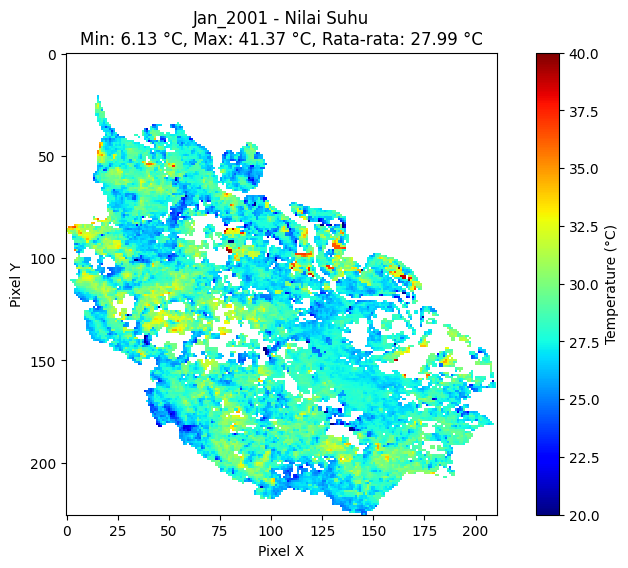

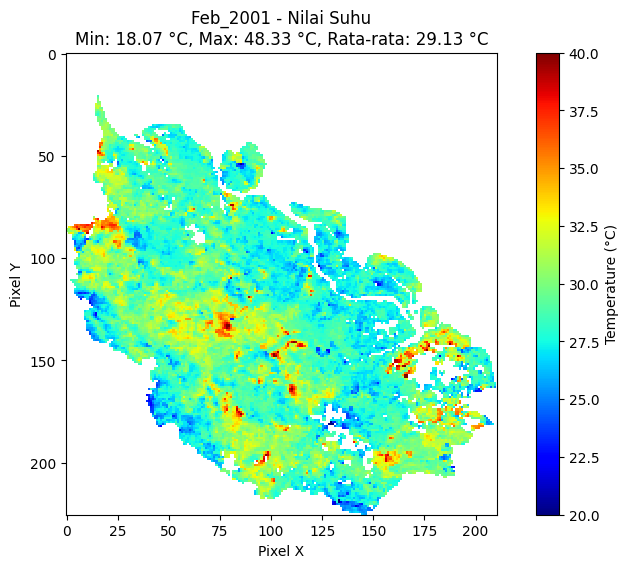

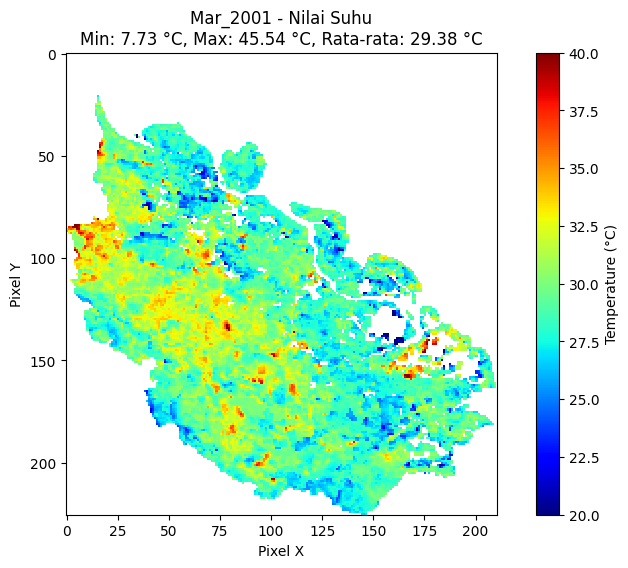

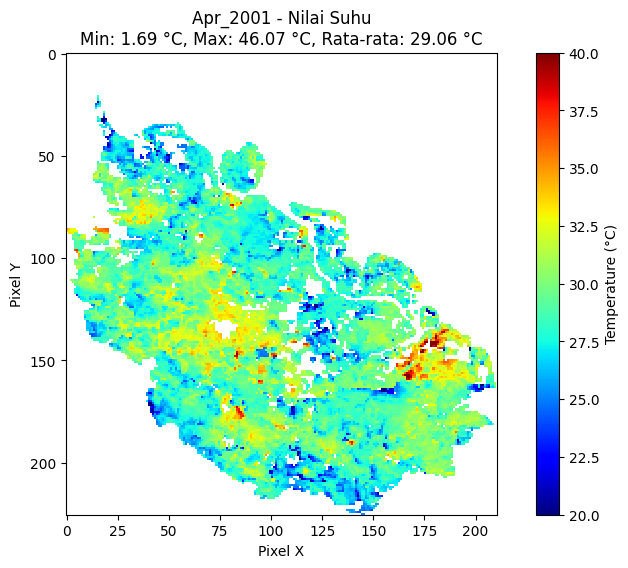

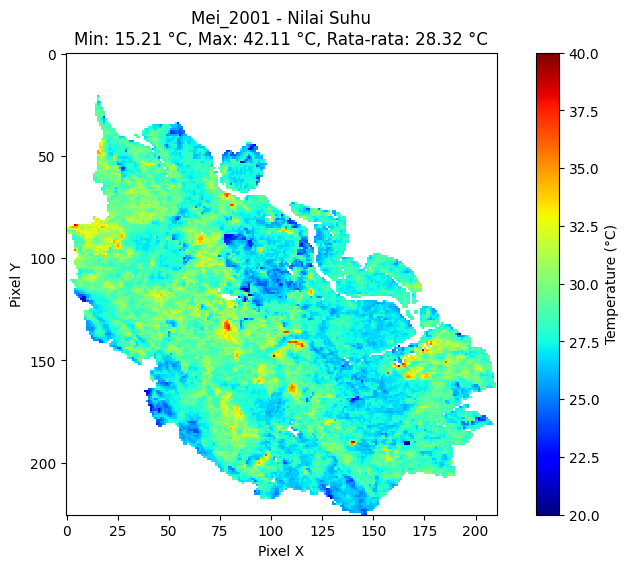

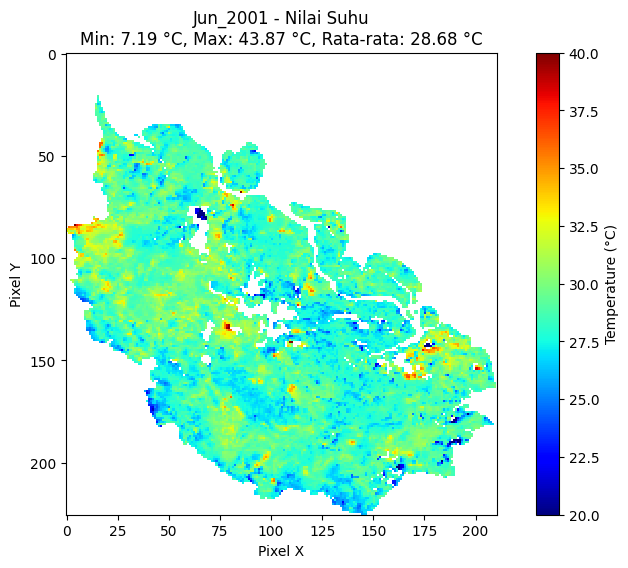

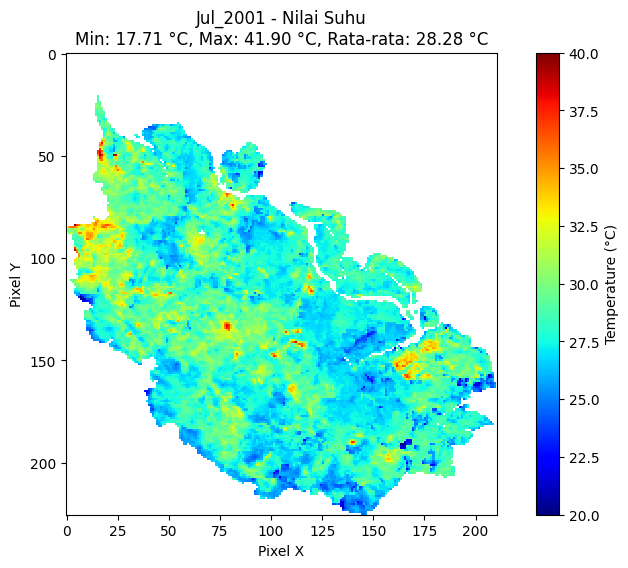

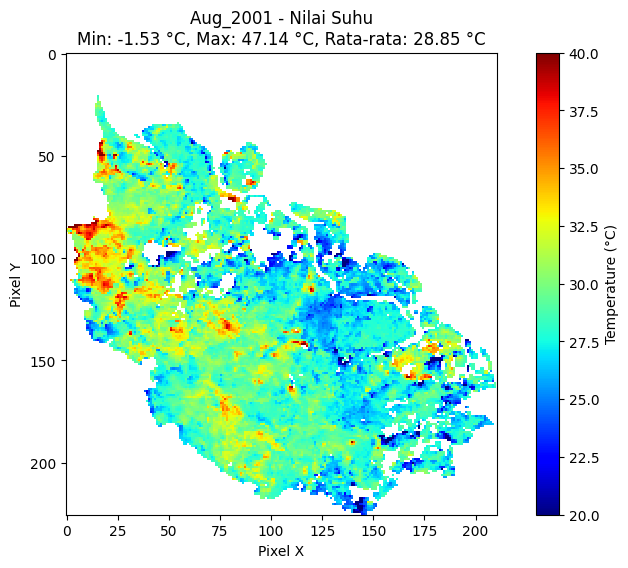

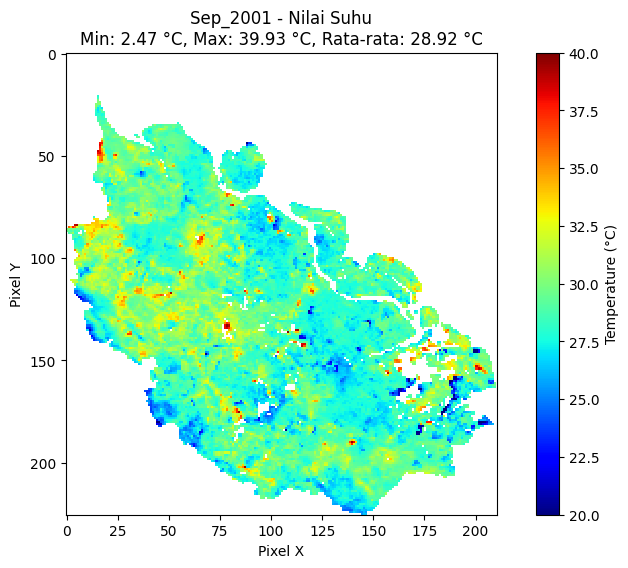

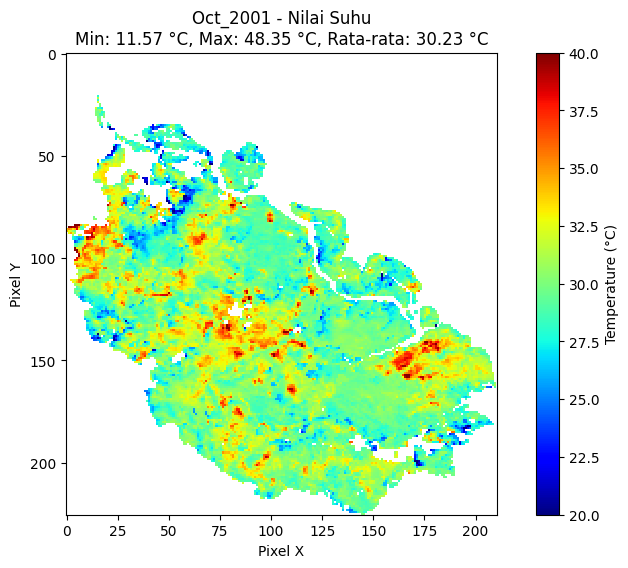

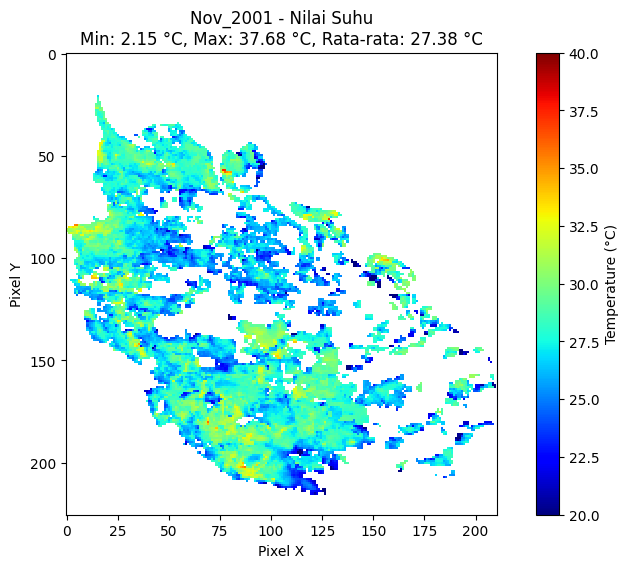

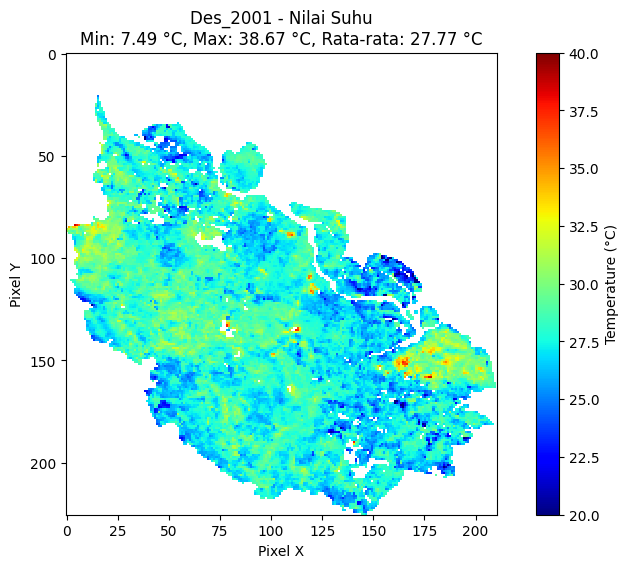

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung nilai suhu dari file GeoTIFF
def calculate_temperature(file_path):
    with rasterio.open(file_path) as src:
        # Baca data band pertama
        band1 = src.read(1)
        # Hitung nilai minimum, maksimum, dan rata-rata
        min_temp = np.nanmin(band1)
        max_temp = np.nanmax(band1)
        mean_temp = np.nanmean(band1)
        return band1, min_temp, max_temp, mean_temp

# Daftar file yang akan diproses
files = {
    'Jan_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Jan_2001.tif',
    'Feb_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Feb_2001.tif',
    'Mar_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Mar_2001.tif',
    'Apr_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Apr_2001.tif',
    'Mei_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Mei_2001.tif',
    'Jun_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Jun_2001.tif',
    'Jul_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Jul_2001.tif',
    'Aug_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Aug_2001.tif',
    'Sep_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Sep_2001.tif',
    'Oct_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Okt_2001.tif',
    'Nov_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Nov_2001.tif',
    'Des_2001': '/content/drive/MyDrive/Data Citra Modis Suhu Permukaan Wilayah Riau/Suhu_Permukaan_Riau_Des_2001.tif'
}

# Tentukan rentang suhu sesuai dengan GEE
vmin = 20
vmax = 40

# Proses setiap file, hitung nilai suhu, dan tampilkan gambar
for label, file_path in files.items():
    # Hitung nilai suhu
    band1, min_temp, max_temp, mean_temp = calculate_temperature(file_path)

    # Tampilkan gambar dan nilai
    plt.figure(figsize=(10, 6))
    plt.imshow(band1, cmap='jet', vmin=vmin, vmax=vmax, interpolation='none')
    plt.colorbar(label='Temperature (°C)')
    plt.title(f'{label} - Nilai Suhu\nMin: {min_temp:.2f} °C, Max: {max_temp:.2f} °C, Rata-rata: {mean_temp:.2f} °C')
    plt.show()


In [ ]:
# Inisialisasi FeatureCollection
table = ee.FeatureCollection("projects/alriawi/assets/SHP-RIAU-RBI50K")

# Fungsi untuk mendapatkan koleksi gambar MODIS
def getModisImageCollection(start_date, end_date):
    return ee.ImageCollection('MODIS/006/MOD11A2')\
            .filterDate(start_date, end_date)\
            .select('LST_Day_1km')\
            .mean()\
            .clip(table)

# Daftar bulan dari Januari 2001 hingga Desember 2001
months = {
    'Jan_2001': ('2001-01-01', '2001-02-01'),
    'Feb_2001': ('2001-02-01', '2001-03-01'),
    'Mar_2001': ('2001-03-01', '2001-04-01'),
    'Apr_2001': ('2001-04-01', '2001-05-01'),
    'May_2001': ('2001-05-01', '2001-06-01'),
    'Jun_2001': ('2001-06-01', '2001-07-01'),
    'Jul_2001': ('2001-07-01', '2001-08-01'),
    'Aug_2001': ('2001-08-01', '2001-09-01'),
    'Sep_2001': ('2001-09-01', '2001-10-01'),
    'Oct_2001': ('2001-10-01', '2001-11-01'),
    'Nov_2001': ('2001-11-01', '2001-12-01'),
    'Dec_2001': ('2001-12-01', '2002-01-01')
}

# Fungsi untuk mengonversi suhu dari Kelvin ke Celsius
def convertKelvinToCelsius(image):
    return image.multiply(0.02).subtract(273.15)

# Inisialisasi peta
Map = geemap.Map()

# Tambahkan layer untuk setiap bulan dan hitung nilai suhu
for label, (start_date, end_date) in months.items():
    image = getModisImageCollection(start_date, end_date)
    celsius_image = convertKelvinToCelsius(image)

    # Menghitung statistik
    stats = celsius_image.reduceRegion(
        reducer=ee.Reducer.mean().combine(ee.Reducer.minMax(), sharedInputs=True),
        geometry=table.geometry(),
        scale=1000,
        bestEffort=True
    )

    # Menampilkan statistik
    mean_temp = stats.get('LST_Day_1km_mean').getInfo()
    min_temp = stats.get('LST_Day_1km_min').getInfo()
    max_temp = stats.get('LST_Day_1km_max').getInfo()

    print(f'Bulan: {label}')
    print(f'  Nilai Min: {min_temp:.2f} °C')
    print(f'  Nilai Max: {max_temp:.2f} °C')
    print(f'  Nilai Rata-rata: {mean_temp:.2f} °C')

    # Menambahkan layer ke peta
    Map.addLayer(celsius_image, {'min': 20, 'max': 40, 'palette': ['blue', 'green', 'yellow', 'orange', 'red']}, f'LST Day 1km {label}')

# Set tampilan peta
Map.centerObject(table)
Map

Bulan: Jan_2001
  Nilai Min: 4.35 °C
  Nilai Max: 41.37 °C
  Nilai Rata-rata: 28.10 °C
Bulan: Feb_2001
  Nilai Min: 17.92 °C
  Nilai Max: 68.31 °C
  Nilai Rata-rata: 29.25 °C
Bulan: Mar_2001
  Nilai Min: -9.17 °C
  Nilai Max: 44.51 °C
  Nilai Rata-rata: 29.48 °C
Bulan: Apr_2001
  Nilai Min: 1.69 °C
  Nilai Max: 45.29 °C
  Nilai Rata-rata: 29.18 °C
Bulan: May_2001
  Nilai Min: 6.09 °C
  Nilai Max: 42.05 °C
  Nilai Rata-rata: 28.40 °C
Bulan: Jun_2001
  Nilai Min: 1.45 °C
  Nilai Max: 43.87 °C
  Nilai Rata-rata: 28.75 °C
Bulan: Jul_2001
  Nilai Min: 10.69 °C
  Nilai Max: 43.04 °C
  Nilai Rata-rata: 28.34 °C
Bulan: Aug_2001
  Nilai Min: -1.53 °C
  Nilai Max: 45.83 °C
  Nilai Rata-rata: 28.99 °C
Bulan: Sep_2001
  Nilai Min: 2.47 °C
  Nilai Max: 42.45 °C
  Nilai Rata-rata: 29.01 °C
Bulan: Oct_2001
  Nilai Min: 9.83 °C
  Nilai Max: 46.89 °C
  Nilai Rata-rata: 30.36 °C
Bulan: Nov_2001
  Nilai Min: 2.15 °C
  Nilai Max: 41.93 °C
  Nilai Rata-rata: 27.52 °C
Bulan: Dec_2001
  Nilai Min: -0.83 °C
 

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…